In [1]:
#importing required packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 
from collections import defaultdict
from scipy.stats import pearsonr, chi2_contingency
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import datetime
import time

In [136]:
accepted_df.shape

(2260668, 83)

In [82]:
#reading in our data
accepted_df = pd.read_csv('accepted_2007_to_2018Q4.csv', sep = ',')

/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#creating function to quickly get an idea of values that comprise feature 
def variable_expl(variable):
    print(accepted_df[variable].value_counts())
    print(' ')
    print('Number of NA\'s is:', accepted_df[variable].isna().sum())
    print('Number of unique values is:', accepted_df[variable].nunique())
    if accepted_df[variable].dtype == 'float64' or accepted_df[variable].dtype == 'int64':
        print('Mean is:', np.mean(accepted_df[variable]))
        print('Std.Dev is:', np.std(accepted_df[variable]))
    else:
        return False

In [4]:
#creating function to return correlation value between two features 
def corr_value(variable1, variable2):
    print(accepted_df[variable1].corr(accepted_df[variable2]))

In [5]:
#creating a function that can print full series values in Jupyter notebook
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [133]:
#creating a function to return correlation values between numeric variables
#num_feat2 needs to be instantiated in order for correlation to run
from collections import defaultdict

        
def correlation(variable):
    dict1 = defaultdict(int)
    for x in accepted_df[num_feat2].columns.values:
        corr1 = accepted_df[x].corr(accepted_df[variable])
        dict1[x] = abs(corr1)
    return sorted(dict1.items(), key = lambda x: x[1], reverse = True)

In [134]:
correlation('total_acc')

[('total_acc', 1.0),
 ('num_rev_accts', 0.7646128837158631),
 ('num_sats', 0.715618428099662),
 ('num_il_tl', 0.6898468290977386),
 ('num_bc_tl', 0.6286868747283412),
 ('num_op_rev_tl', 0.575339920133672),
 ('acc_open_past_24mths', 0.4339735461976328),
 ('total_il_high_credit_limit', 0.4270151149839923),
 ('num_rev_tl_bal_gt_0', 0.4183287417631669),
 ('num_bc_sats', 0.41412990941646977),
 ('open_act_il', 0.3990272798306095),
 ('mort_acc', 0.36787312666722655),
 ('open_il_24m', 0.35438332991276866),
 ('tot_hi_cred_lim', 0.34853855803193284),
 ('mo_sin_old_il_acct', 0.34116263231882193),
 ('num_tl_op_past_12m', 0.3337716208911677),
 ('total_rev_hi_lim', 0.3194265905229146),
 ('num_actv_bc_tl', 0.3148739896338451),
 ('open_rv_24m', 0.3121346755128122),
 ('total_bc_limit', 0.29388209525743186),
 ('total_cu_tl', 0.29359220984608253),
 ('mo_sin_old_rev_tl_op', 0.2807678195031766),
 ('open_acc_6m', 0.26025692201923833),
 ('open_il_12m', 0.258875201684099),
 ('open_rv_12m', 0.2481847183344556)

In [189]:
accepted_df['Year'] = pd.DatetimeIndex(accepted_df['issue_d_date']).year
accepted_df['Year']

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
2260694    2016
2260695    2016
2260696    2016
2260697    2016
2260698    2016
Name: Year, Length: 2260668, dtype: int64

In [199]:
#we can see that open_act_il is a variable introduced only in 2015, therefore mean impute previous years 
print_full(accepted_df.groupby(['Year'])['mo_sin_old_rev_tl_op'].mean())

Year
2012    172.045620
2013    179.713131
2014    185.748609
2015    186.586697
2018    174.638102
Name: mo_sin_old_rev_tl_op, dtype: float64


In [207]:
variable_expl('num_actv_bc_tl')

3.0     276601
2.0     262642
4.0     216696
1.0     149366
5.0     146583
6.0      92827
7.0      55337
8.0      32976
0.0      29842
9.0      19599
10.0     11753
11.0      7103
12.0      4189
13.0      2524
14.0      1562
15.0      1043
16.0       597
17.0       415
18.0       256
19.0       161
20.0       100
21.0        68
22.0        54
23.0        36
24.0        26
25.0        14
26.0        10
29.0         6
27.0         6
28.0         6
48.0         2
32.0         2
30.0         2
50.0         1
45.0         1
Name: num_actv_bc_tl, dtype: int64
 
Number of NA's is: 27741
Number of unique values is: 35
Mean is: 3.685367942542171
Std.Dev is: 2.2994420153686463


In [218]:
variable_expl('purpose')

debt_consolidation    764119
credit_card           328419
home_improvement       81383
other                  73489
major_purchase         26588
medical                14410
small_business         12969
car                    12228
house                   8711
moving                  7901
vacation                7837
wedding                 1348
renewable_energy         744
educational                1
Name: purpose, dtype: int64
 
Number of NA's is: 0
Number of unique values is: 14


False

In [214]:
#fillmean values 
fillmean = ['annual_inc','delinq_amnt','acc_now_delinq','delinq_2yrs','dti','revol_util','inq_last_6mths',
           'open_acc','pub_rec','open_acc_6m','open_act_il','open_il_12m','open_il_24m','mths_since_rcnt_il',
           'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi',
           'total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util',
           'mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mths_since_recent_bc',
           'mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl','num_bc_sats','num_bc_tl','num_il_tl',
           'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd',
           'num_tl_90g_dpd_24m','num_tl_op_past_12m','percent_bc_gt_75','tot_hi_cred_lim','total_bc_limit',
           'total_il_high_credit_limit']
#missing values here likely mean absence of the feature for that observation. 
fillzero = ['open_acc','pub_rec','inq_last_6mths','tax_liens','collections_12_mths_ex_med',
           'chargeoff_within_12_mths','pub_rec_bankruptcies','emp_length','tot_coll_amt']
def fillvars(accepted_df):
    for x in fillmean:
        try:
            accepted_df[x] = accepted_df[x].fillna(accepted_df[x].mean())
        except:
            continue
    for d in fillzero:
        try:
            accepted_df[d] = accepted_df[d].fillna(0)
        except:
            continue
fillvars(accepted_df)
    

/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [128]:
variable_expl('chargeoff_within_12_mths')

0.0     2243339
1.0       15765
2.0        1115
3.0         186
4.0          68
5.0          22
6.0          12
7.0           8
9.0           5
8.0           2
10.0          1
Name: chargeoff_within_12_mths, dtype: int64
 
Number of NA's is: 145
Number of unique values is: 11
Mean is: 0.008464412881443808
Std.Dev is: 0.1048097659846299


In [87]:
#dropping observations with NA's for loan status
accepted_df = accepted_df.dropna(subset = ['loan_status'])

#creates issue_d_year and issue_d_month variables that will be later used to filter the dataframe 

def data_transformation(df):
    df[['earliest_cr_line_month','earliest_cr_line_year']] = df['earliest_cr_line'].str.split('-', expand = True)
    df['earliest_cr_line_year'] = df['earliest_cr_line_year'].fillna('2019')
    df['earliest_cr_line_month'] = df['earliest_cr_line_month'].fillna('Jun')
    df[['issue_d_month','issue_d_year']] = df['issue_d'].str.split('-', expand = True)
    accepted_df.issue_d_year = accepted_df.issue_d_year.astype('int64')
    return df.shape
data_transformation(accepted_df)

#filters the accepted_df dataframe to only include 2017, 2018 and 2019 values
#not needed any longer
accepted_df = accepted_df[accepted_df['issue_d_year'].isin([2012,2013,2014,2015,20162017,2018,2019])]

/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

(2260668, 155)

In [ ]:
#dropping irrelevant or missing data features from the start

#dropping certain variables from the get-go in order to reduce processing time during multicollinearity analysis
accepted_df = accepted_df.drop(['member_id','id','funded_amnt_inv','url','desc'], axis = 1)
#looking at variables with highest NA counts
accepted_df_nas = (accepted_df.isna().sum()/accepted_df.shape[0]).reset_index()
accepted_df_nas.columns = ['Feature','Percent_Missing']
accepted_df_nas = accepted_df_nas.sort_values(by = 'Percent_Missing')
#getting index list of variables wiht > 50% missing values 
index1 = list(accepted_df_nas[accepted_df_nas['Percent_Missing'] > 0.5].index)
#dropping the columns that have missing values > 0.5
accepted_df.drop(accepted_df.columns[index1], axis = 1, inplace = True)
#since policy_code has only one value, drop this column as well
accepted_df = accepted_df.drop(['policy_code'], axis = 1)
#zip_code variable has last two digits of zip_code missing, so we can safely drop this one 
accepted_df = accepted_df.drop(['zip_code'], axis = 1)
#drop last_payment_d variable because this variable would not be accessible to investors and would introduce data leakage
accepted_df.drop(['last_pymnt_d','collection_recovery_fee','recoveries'], axis = 1, inplace = True)
#drop last_fico_range_low because of high correlation with last_fico_range_high
accepted_df.drop(['last_fico_range_low'], axis = 1, inplace = True)
#cleaning categorical variables 
#term should be converted to numeric
accepted_df['term'] = accepted_df['term'].replace({' 36 months':36,' 60 months':60})
#85% of last_credit_pull_d values are Mar-2019, so drop
accepted_df.drop(['last_credit_pull_d'], axis = 1, inplace = True)
#title and purpose variables are quasi-identical, so drop one
accepted_df.drop(['title'], axis = 1, inplace = True)
#creating a new variable to capture number of years of oldest credit line, defined as issue_d - earliest_cr_line
#mapping date variables and converting to datetime objects 
month_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
accepted_df['issue_d_month_num'] = accepted_df['issue_d_month'][:] 
accepted_df['issue_d_month_num'] = accepted_df['issue_d_month_num'].replace(month_dict)
accepted_df['issue_d_date'] = str('15/') + accepted_df['issue_d_month_num'].astype(str) + '/' + accepted_df['issue_d_year'].astype(str)
accepted_df['issue_d_date'] = pd.to_datetime(accepted_df['issue_d_date'], infer_datetime_format=True)
accepted_df.drop(['issue_d_month_num'], axis = 1, inplace = True)

In [91]:
accepted_df['earliest_cr_line_month_num'] = accepted_df['earliest_cr_line_month'][:] 
accepted_df['earliest_cr_line_month_num'] = accepted_df['earliest_cr_line_month'].replace(month_dict)
accepted_df['earliest_cr_line_date'] = str('15/') + accepted_df['earliest_cr_line_month_num'].astype(str) + '/' + accepted_df['earliest_cr_line_year'].astype(str)
accepted_df.drop(['earliest_cr_line_month_num'], axis = 1, inplace = True)
accepted_df['earliest_cr_line_date'] = pd.to_datetime(accepted_df['earliest_cr_line_date'], infer_datetime_format=True)
#creating new variable capturing amount of years of oldest credit line 
accepted_df['earliest_credit_line_years'] = accepted_df['issue_d_date'] - accepted_df['earliest_cr_line_date'] 
#dropping debt_settlement_flag because this would introduce data leakage into the dataset
#dropping 'earliest_cr_line_month','earliest_cr_line_year','issue_d_month' because these are now captured in earliest_credit_line_yearsa nd issue_d_date
accepted_df.drop(['debt_settlement_flag', 'earliest_cr_line_month','earliest_cr_line_year','issue_d_month'], axis = 1, inplace = True)
#dropping earliest_cr_line
accepted_df.drop(['earliest_cr_line'], axis = 1, inplace = True)
#dropping emp_title because mapping to general categories i.e. Director or President 
# would most likely be highly correlated with income and would be very computationally/time expensive
accepted_df.drop(['emp_title'],axis = 1, inplace = True)
#dropping issue_d_year because year already captured in issue_d_date
accepted_df.drop(['issue_d_year'],axis = 1, inplace = True)
#dropping issue_d because year already captured in issue_d_date
accepted_df.drop(['issue_d'],axis = 1, inplace = True)
#mapping 10+ years to 11 years and <1 years to 0 years in emp_length and converting this to a float
accepted_df['emp_length'] = accepted_df['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})
accepted_df['emp_length'] = accepted_df['emp_length'].str.extract('(\d+)').astype('float')
#replacing values in application_type_variable
accepted_df['application_type'] = accepted_df['application_type'].replace({'Individual':'Ind','Joint App':'Joint'}) 
#dropping pymnt_plan and hardship_flag because keeping these would constitute data leakage 
accepted_df.drop(['pymnt_plan','hardship_flag'],axis = 1, inplace = True)
#mapping our dependent variable loan_status to 0/1 values
accepted_df['loan_status'] = accepted_df['loan_status'].isin(['Fully Paid','Current','In Grace Period','Does not meet the credit policy. Status:Fully Paid']).astype('int64')
accepted_df['loan_status']

In [ ]:
#exploring pairs of highly correlated numeric variables
comb_num_feat = list(combinations(num_feat2, 2))
corrdict = defaultdict(int)
for comb in comb_num_feat:
    try:
        corr = accepted_df[comb[0]].corr(accepted_df[comb[1]])
        corrdict[comb] = abs(corr)
    except:
        continue

#addressing multicollinearity in numeric variables
#dropping numeric variables that are highly correlated with one another
def variable_drop(corrdict, value):
    filtered_dict = dict(filter(lambda x: x[1] > value, corrdict.items()))
    dropped_variables = []
    for k,v in filtered_dict.items():
        if k != 'loan_status':
            try:
                accepted_df.drop(k[0], axis = 1, inplace = True)
                print('Highly correlated pair:',k,v)
                dropped_variables.append(k[0])
            except:
                print('Next')
                continue
    print(dropped_variables)
variable_drop(corrdict, 0.85)

In [228]:
#creating list of all numeric variable names
num_feat2 = []
for x in accepted_df.columns.values:
    if accepted_df[x].dtype == 'int64' or accepted_df[x].dtype == 'float64':
        num_feat2.append(x)
    else:
        continue

print(len(num_feat2))

70


In [103]:
#creating list of all categorical variable names
cat_feat = []
for var in accepted_df.columns:
    if accepted_df[var].dtype == 'O':
        cat_feat.append(var)
    else:
        continue
        
print(len(cat_feat))

8


In [ ]:
#addressing multicollinearity in categorical variables
#dropping categorical variables that are highly correlated with one another
cat_feat = []
for var in accepted_df.columns:
    if accepted_df[var].dtype == 'O' and var != 'loan_status':
        cat_feat.append(var)
    else:
        continue
print('Num Features',len(cat_feat))
try:
    cat_feat.remove(0)
except:
    pass
    
comb_cat_feat = list(combinations(cat_feat, 2))
print('Num combinations',len(comb_cat_feat))

corrdict2 = defaultdict(int)
for comb in comb_cat_feat:
    table = pd.pivot_table(accepted_df, values='loan_amnt', index=comb[0], columns=comb[1], aggfunc='count').fillna(0)
    corr = np.sqrt(chi2_contingency(table)[0] / (table.values.sum() * (np.min(table.shape) - 1) ) )
    corrdict2[comb] = np.abs(corr)
corrdict2

#creating function to drop first feature in highly correlated categorical feature pairs 
#for value = 0.85, we are just dropping grade feature
def drop_corr_cat(value):
    for x in list(filter(lambda x: x[1] > value, corrdict2.items())):
        try:
            accepted_df.drop([x[0][0]], axis = 1, inplace = True)
        except:
            continue
drop_corr_cat(0.85)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 1)
test1 = imputer.fit_transform(accepted_df[['num_rev_accts','total_acc']])
test1

In [ ]:
#come back to this later --last_credit_pull_d
#missing value should be filled with mode of observations with same issue_d --use groupby
accepted_df2 = accepted_df['last_credit_pull_d'].fillna(accepted_df.groupby(['issue_d']).transform(lambda x: x.mode().iloc[0]))
print_full(pd.DataFrame(accepted_df2))

accepted_df['last_credit_pull_d'] = accepted_df.groupby(['issue_d'])['last_credit_pull_d'].agg(pd.Series.mode)

In [230]:
accepted_df_na2 = (accepted_df.isna().sum()).reset_index()
accepted_df_na2.columns = ['Feature','NAs']
print_full(accepted_df_na2[accepted_df_na2['NAs'] > 0 ].sort_values(by = ['NAs']))

Empty DataFrame
Columns: [Feature, NAs]
Index: []


In [ ]:
#imputing missing values in certain columns with simple linear regression
from sklearn.linear_model import LinearRegression
regress_features = ['dti']
lnreg = LinearRegression()
for x in regress_features:
    missing_index = accepted_df[x].isna().index
    accepted_df[x] = 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=1, random_state=0)
imp.fit(accepted_df[num_feat])
imp.transform(accepted_df['dti'])

In [17]:
from sklearn.impute import SimpleImputer
df1 = pd.DataFrame([[1,np.nan,3],[4,5,np.nan]], columns = ['a','b','c'])
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mean.fit(df1)
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
imp_mean.transform(X)

array([[ 2.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ],
       [10. ,  5. ,  9. ]])

(0.0, 300000.0)

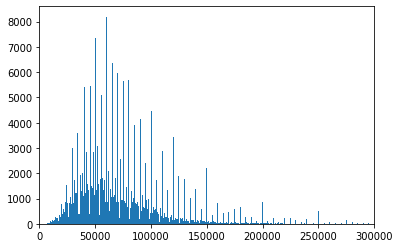

In [141]:
#EDA on annual_inc
import matplotlib.pyplot as plt
plt.hist(accepted_df['annual_inc'][:200000],10000)
plt.xlim(0,300000)